In [1]:
from __future__ import division
import os
import re
import time

import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile

import numpy as np
import pandas as pd

import cPickle as pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier as RF

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import src.data_pipeline as dpl
import src.fsm2 as fsm
import src.predict_one as p_1
import src.evaluator as ev

In [3]:
# dpl.process_photos("/Volumes/Seagate Backup Plus Drive/CNWPhotos/Wolf Target Species/Taneum", dataset_name='sample_3_data')

In [3]:
# Prepare Data: 
F,L,paths = fsm.prep_data('sample_3_data', drop_hare=True)

Keyword Value Counts: 
[u'elk']                                 2037
[u'coyote']                               656
[u'mule deer']                            438
[u'human']                                423
[u'Elk']                                  204
[u'deer']                                 196
[u'sheep']                                129
[u'bobcat']                               126
[u'bird']                                 105
[u'Black Bear']                            72
[u'domestic dog', u'human']                43
[u'black bear']                            42
[u'Camera Check']                          41
[u'human', u'sheep']                       25
[u'unidentified']                          20
[u'camera check']                          17
[u'Horse and Rider']                       15
[u'mountain lion']                         12
[u'skunk']                                 12
[u'ELK']                                    9
[u'Horse and Rider', u'human']              6
[u'horse an

In [ ]:
# Create Model
svm = fsm.create_SVC()
model, X_test, y_test, y_pred, y_prob = fsm.run_fit(svm,F,L, test_size = .4)

In [61]:
with open("data/svm2.pkl","wb") as pkl_loc:
    pickle.dump(model, pkl_loc)

# Same Camera Test

In [49]:
cm, pm = ev.cm_report(L, y_test, y_pred)
# ev.eval_model(model, X_test, y_test)

Total value counts: 
Ungulate    2475
Other        697
Canine       660
Feline       138
Small        105
Name: keywords, dtype: int64

Test set value counts:
Ungulate    972
Canine      274
Other       274
Feline       65
Small        45
Name: keywords, dtype: int64


Canine
Feline
Other
Small
Ungulate

Test Confusion Matrix:
[[269   0   4   0   1]
 [  3  62   0   0   0]
 [  3   1 261   1   8]
 [  0   0   0  39   6]
 [  6   6   6   1 953]]

Percentage True in each predicted class
[[ 98.18   0.     1.46   0.     0.36]
 [  4.62  95.38   0.     0.     0.  ]
 [  1.09   0.36  95.26   0.36   2.92]
 [  0.     0.     0.    86.67  13.33]
 [  0.62   0.62   0.62   0.1   98.05]]




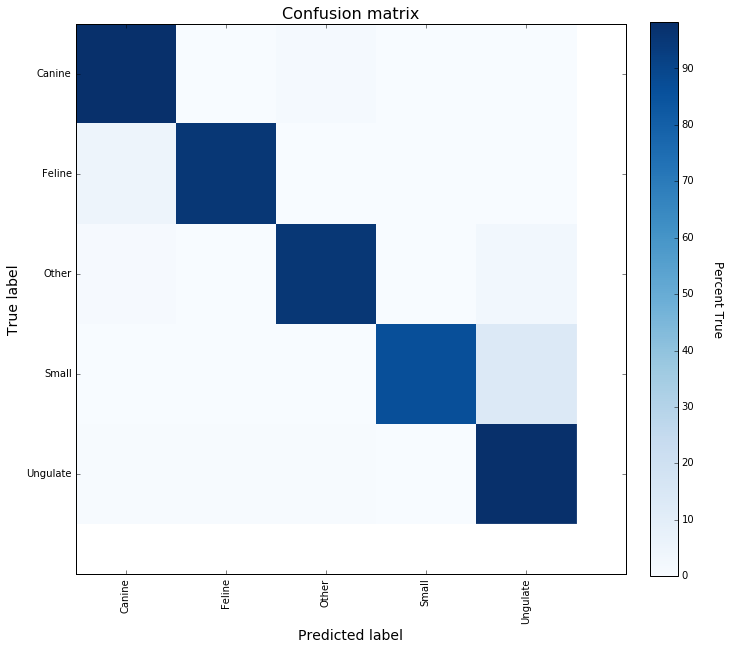

In [46]:
ev.plot_matrix(pm, y_test, y_pred, save_as='BalancedCM2')

# New Camera Test

In [50]:
unseen_X, unseen_y, unseen_paths = fsm.prep_data('second_sample_data', drop_hare=True)

Keyword Value Counts: 
[u'snowshoe hare']               928
[u'White-tailed deer']           123
[u'coyote']                       83
[u'unidentified']                 72
[u'mouse']                        61
[u'mule deer']                    36
[u'Canada lynx']                  34
[u'elk']                          34
[u'red squirrel']                 17
[u'domestic dog']                 12
[u'Robin']                        10
[u'Camera Check']                 10
[u'bobcat']                        9
[u'striped skunk']                 9
[u'cougar']                        6
[u'bird']                          6
[u'northern flying squirrel']      5
[u'Wolverine']                     3
[u'Squirrel (unidentified)']       3
[]                                 1
[u'chipmunk']                      1
[u'Squirrel']                      1
Name: keywords, dtype: int64

1 photos have a blank keyword entries

dropping "Hare" for balance

Final Group Count
Ungulate    193
Small       104
Canine       95

In [52]:
unseen_pred = model.predict(unseen_X)
unseen_probs = model.predict_proba(unseen_X)

Total value counts: 
Ungulate    2475
Other        697
Canine       660
Feline       138
Small        105
Name: keywords, dtype: int64

Test set value counts:
Ungulate    193
Small       104
Canine       95
Other        95
Feline       49
Name: keywords, dtype: int64


Canine
Feline
Other
Small
Ungulate

Test Confusion Matrix:
[[72  9  2  0 12]
 [38  4  4  0  3]
 [24  4 35  3 29]
 [ 8  5 61  0 30]
 [47 38 51  1 56]]

Percentage True in each predicted class
[[ 75.79   9.47   2.11   0.    12.63]
 [ 77.55   8.16   8.16   0.     6.12]
 [ 25.26   4.21  36.84   3.16  30.53]
 [  7.69   4.81  58.65   0.    28.85]
 [ 24.35  19.69  26.42   0.52  29.02]]




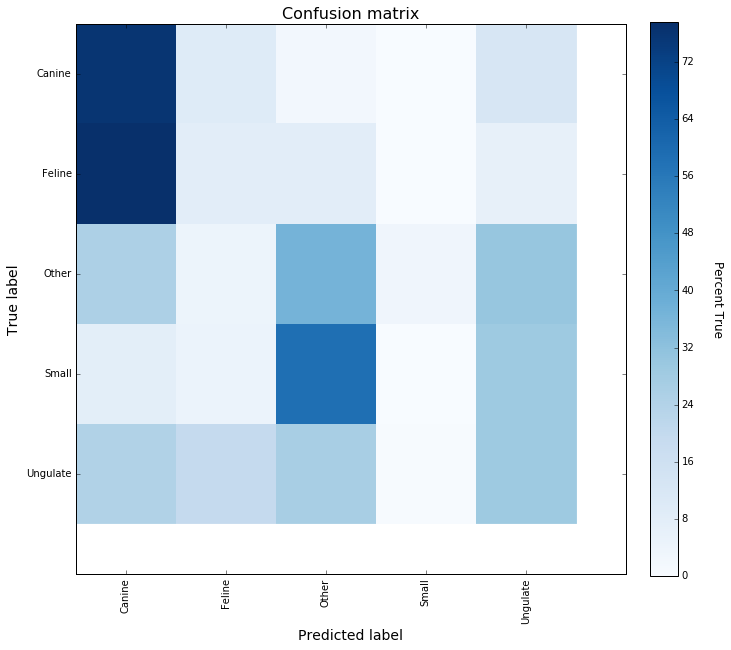

In [54]:
unseen_CM, unseen_PM = ev.cm_report(L, unseen_y, unseen_pred)
ev.plot_matrix(unseen_PM, unseen_y, unseen_pred, save_as='UnseenCM2')

# Individual Images:

In [86]:
def pred_and_plot(photo_name):
    prediction = p_1.predict('data/presentation/{}.JPG'.format(photo_name))
    ev.plot_probs(prediction, save_as = "{}_pred".format(photo_name))
    return prediction

     groups     probs
0    Canine  0.000097
3     Small  0.000141
2     Other  0.002704
1    Feline  0.002706
4  Ungulate  0.994352


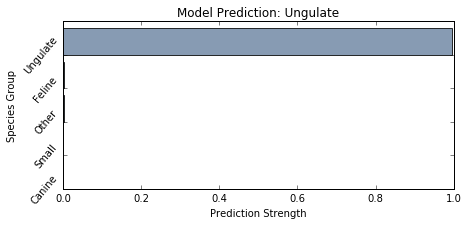

In [77]:
agalloch = p_1.predict('data/presentation/agalloch.jpg')

ev.plot_probs(agalloch, save_as = 'agalloch_pred')

Processing data/presentation/coyote.JPG...
prediction prepared
     groups     probs
3     Small  0.006502
4  Ungulate  0.049447
2     Other  0.051721
1    Feline  0.062608
0    Canine  0.829722


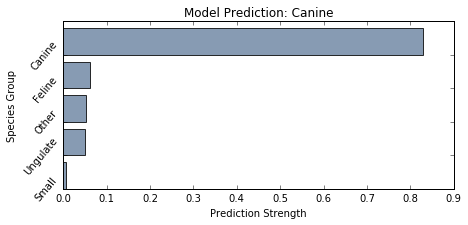

CPU times: user 13.2 s, sys: 3.2 s, total: 16.4 s
Wall time: 15.8 s


In [81]:
%%time
coyote = p_1.predict('data/presentation/coyote.JPG')
ev.plot_probs(coyote, save_as = "coyote_pred")

# Ask Jeff - 'probs' not always aligning with prediction

Processing data/presentation/cougar.JPG...
prediction prepared
     groups     probs
3     Small  0.032835
2     Other  0.177910
4  Ungulate  0.194403
0    Canine  0.246833
1    Feline  0.348019


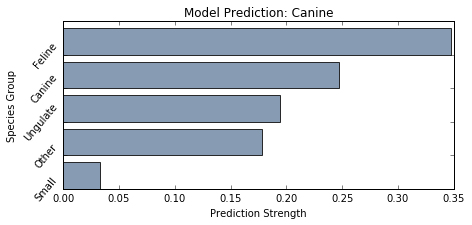

In [78]:
cougar = p_1.predict('data/presentation/cougar.JPG')
ev.plot_probs(cougar, save_as = "cougar_pred")

Processing data/presentation/wolf.JPG...
prediction prepared
     groups     probs
3     Small  0.012026
1    Feline  0.036272
0    Canine  0.246983
2     Other  0.285519
4  Ungulate  0.419200


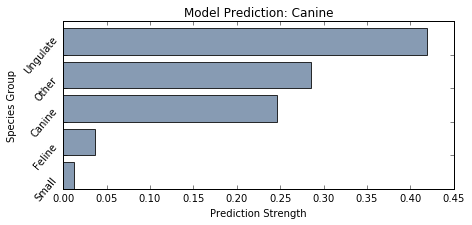

CPU times: user 22.4 s, sys: 11.4 s, total: 33.8 s
Wall time: 40.2 s


In [92]:
%%time
wolf = pred_and_plot('wolf')

Processing data/presentation/mossy2.JPG...
prediction prepared
     groups     probs
1    Feline  0.000175
3     Small  0.000485
4  Ungulate  0.006513
0    Canine  0.018022
2     Other  0.974805


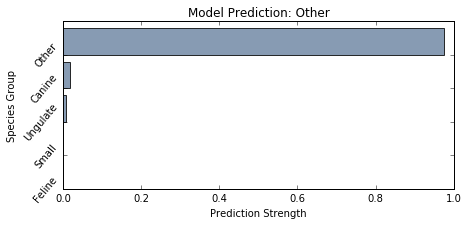

CPU times: user 16.7 s, sys: 4.72 s, total: 21.4 s
Wall time: 21.9 s


In [87]:
%%time
mossy = pred_and_plot('mossy2')

Processing data/presentation/elk.JPG...
prediction prepared
     groups     probs
3     Small  0.000595
0    Canine  0.001762
1    Feline  0.004533
2     Other  0.012967
4  Ungulate  0.980143


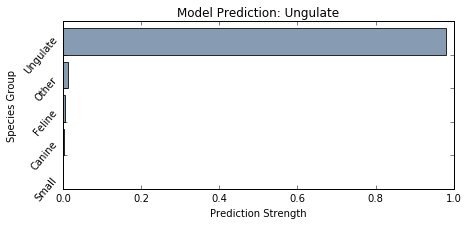

In [88]:
elk = pred_and_plot('elk')

Processing data/presentation/ea_intro.JPG...
prediction prepared
     groups     probs
0    Canine  0.000966
1    Feline  0.001162
2     Other  0.003604
3     Small  0.006378
4  Ungulate  0.987890


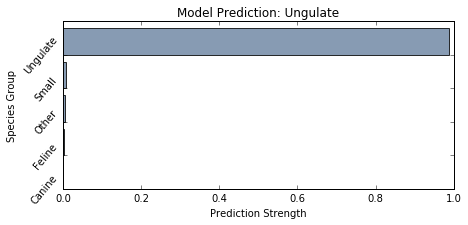

CPU times: user 18.8 s, sys: 7.02 s, total: 25.8 s
Wall time: 26.5 s


In [89]:
%%time
ea_intro = pred_and_plot('ea_intro')

Processing data/presentation/lynx.JPG...
prediction prepared
     groups     probs
3     Small  0.000162
2     Other  0.000243
4  Ungulate  0.000346
0    Canine  0.466787
1    Feline  0.532462


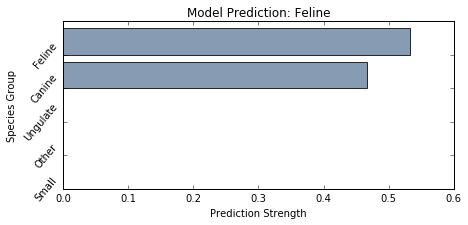

CPU times: user 21.6 s, sys: 9.84 s, total: 31.4 s
Wall time: 35.4 s


In [91]:
%%time
lynx = pred_and_plot('lynx')

In [96]:
lynx[0][0], lynx[1][0]

('Feline', array([  4.66786940e-01,   5.32462321e-01,   2.42724462e-04,
          1.61673220e-04,   3.46340999e-04]))